## En este notebook vamos ver cómo aplicar los diferentes algoritmos de clustering a la data de iris y algunas aplicaciones de la PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Esta dataset se podía cargar directamente de scikit, dentro del módulo datasets

In [2]:
from sklearn.datasets import load_iris

In [3]:
#Cargo los datos
data = load_iris()

In [4]:
#Defino la matriz de features
X = data.data

In [5]:
#Defino el vector de targets
y = data.target

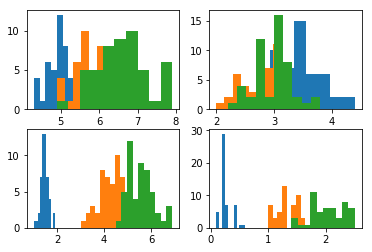

In [8]:
#Miro la distribución de las clases para cada variable mediante histogramas

fig, axs= plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()

for i in range(X.shape[1]):
    
    axs[i].hist(X[y==0,i])
    axs[i].hist(X[y==1,i])
    axs[i].hist(X[y==2,i])

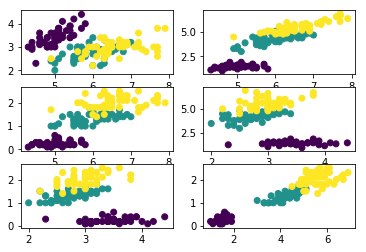

In [9]:
# También usando scatter plots
fig, axs= plt.subplots(nrows=3, ncols=2)
axs = axs.flatten()

axs[0].scatter(X[:,0],X[:,1], c = y)
axs[1].scatter(X[:,0],X[:,2], c = y)
axs[2].scatter(X[:,0],X[:,3], c = y)
axs[3].scatter(X[:,1],X[:,2], c = y)
axs[4].scatter(X[:,1],X[:,3], c = y)
axs[5].scatter(X[:,2],X[:,3], c = y)

Vamos a estandarizar los datos, puesto que lo vamos a necesitar para hacer el kmeans (dado que todas las variables tienen que ser del mismo rango) y para hacer la pca

In [10]:
from sklearn import preprocessing

ss = preprocessing.StandardScaler()

X_scaled = pd.DataFrame( ss.fit_transform(X), columns = data.feature_names)

Probamos diferentes algoritmos de clustering y vemos su rendimiento en la reconstrucción de los tres grupos

In [11]:
from sklearn.cluster import KMeans

nclusters = 3

km = KMeans(n_clusters=nclusters, random_state=0, n_init=100)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters, n_init = 100, random_state=100)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3,compute_full_tree=True)
y_cluster_agg = agg.fit_predict(X_scaled)
y_cluster_agg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
from sklearn.metrics import completeness_score
print(completeness_score(y, y_cluster_kmeans))
print(completeness_score(y, y_cluster_gmm))
print(completeness_score(y, y_cluster_agg))

0.6598476779627759
0.9010648908640206
0.6940248415952218


In [15]:
from sklearn.metrics import adjusted_mutual_info_score
print(adjusted_mutual_info_score(y, y_cluster_kmeans))
print(adjusted_mutual_info_score(y, y_cluster_gmm))
print(adjusted_mutual_info_score(y, y_cluster_agg))

0.6548603058807271
0.8970537476260634
0.6535872901783139


/home/javitxu/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Veamos el número de clusters usando el método elbow. En este caso, podemos llamar al atributo *inertia_* de kmeans después de fittearlo. Dicho atributo nos devuelve la suma del cuadrado de las distancias a los centroides, que es lo que optimiza kmeans. Para más info, podéis ver la documentación de kmeans en scikit http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

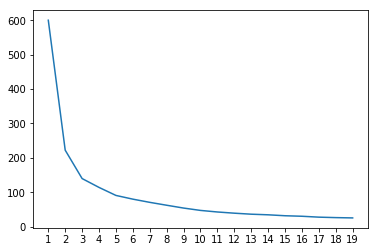

In [16]:
kmeans_scores = []
for k in np.arange(1,20):
    km = KMeans(n_clusters=k, random_state=0, n_init=100)
    km.fit(X_scaled)
    kmeans_scores.append(km.inertia_)

plt.plot(np.arange(1,20), kmeans_scores)
plt.xticks(np.arange(1,20))
pass

### PCA para la visualización

Vamos a ver cómo usar la pca, en este caso para facilitarnos la visualización de las clases

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data = X_pca
             , columns = ['pc1', 'pc2'])

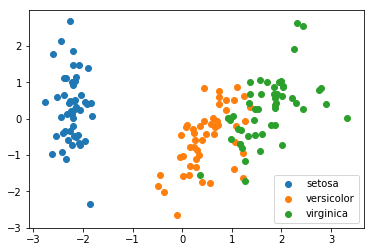

In [18]:
plt.scatter(pca_df.iloc[y==0,0].values,pca_df.iloc[y==0,1].values)
plt.scatter(pca_df.iloc[y==1,0].values,pca_df.iloc[y==1,1].values)
plt.scatter(pca_df.iloc[y==2,0].values,pca_df.iloc[y==2,1].values)
plt.legend(data.target_names)

Una vez fitteada la pca, podemos ver el ratio de la variación explicada por cada componente accediendo al atributo *explained_variance_ratio_* del objeto de la pca. Para más info, podéis acceder a la documentación de la clase PCA en scikit http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [19]:
print( "la variacion de cada compenentes es = " , pca.explained_variance_ratio_)
print( "la variacion total explicada por las componentes de la pca es = " , np.sum(pca.explained_variance_ratio_))

('la variacion de cada compenentes es = ', array([0.72962445, 0.22850762]))
('la variacion total explicada por las componentes de la pca es = ', 0.9581320720000164)


In [20]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

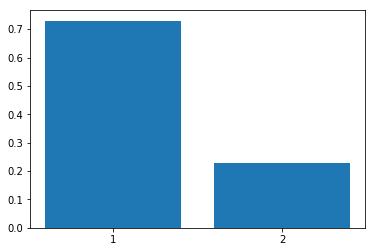

In [21]:
plt.bar([1,2], pca.explained_variance_ratio_)
plt.xticks([1,2])
pass

También podríamos haberle pedido que nos hiciera la descomposición en tres componentes

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data = X_pca
             , columns = ['pc1', 'pc2','pc3'])

In [23]:
print( "la variacion total explicada en este caso es = " , np.sum(pca.explained_variance_ratio_))

('la variacion total explicada en este caso es = ', 0.9948212908928452)


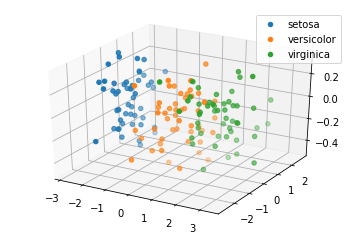

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.iloc[y==0,0].values,pca_df.iloc[y==0,1].values, pca_df.iloc[y==0,2].values)
ax.scatter(pca_df.iloc[y==1,0].values,pca_df.iloc[y==1,1].values, pca_df.iloc[y==0,2].values)
ax.scatter(pca_df.iloc[y==2,0].values,pca_df.iloc[y==2,1].values,pca_df.iloc[y==0,2].values)
ax.legend(data.target_names)

Por otro lado, cuando usamos la pca, también podemos pasarle la variación de los datos que queremos que explique. Se lo pasamos como un float entre 0 y 1 al argumento *n_components*. De esta manera, la pca coge las componentes que calculan la variación de los datos que queremos explicar. Una vez ajustada la pca a los datos, podemos acceder al atributo *n_components_* (con una sola barra baja al final) para saber las componentes seleccionadas

In [25]:
# Por ejemplo pedimos al menos el 70%
pca = PCA(n_components=0.70)
pca.fit(X_scaled)
print( "El numero de componentes seleccionadas es = " , pca.n_components_)
print( "la variacion total explicada en este caso es = " , np.sum(pca.explained_variance_ratio_))

('El numero de componentes seleccionadas es = ', 1)
('la variacion total explicada en este caso es = ', 0.7296244541329985)


### PCA para reducir el tiempo computacional (Opcional)

Podemos usar pca para reducir el número de dimensiones y así reducir la carga computacional

In [26]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

/home/javitxu/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/javitxu/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, 
                                                    mnist.target, 
                                                    test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/home/javitxu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
from sklearn.decomposition import PCA

pca = PCA(.95)

In [30]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=0)

In [38]:
import time

start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print("el tiempo que ha tardado usando toda la data:", end_time - start_time)
print(clf.score(X_test, y_test))

('el tiempo que ha tardado usando toda la data:', 4.747334003448486)
0.912


In [39]:
start_time = time.time()
clf.fit(X_train_pca, y_train)
end_time = time.time()
print("el tiempo que ha tardado usando el 95%:", end_time - start_time)
print(clf.score(X_test_pca, y_test))

('el tiempo que ha tardado usando el 95%:', 2.365338087081909)
0.9127142857142857
